# Flight Price Prediction

***Problem Statement:-***

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 


## importing libraries

In [133]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np
#Data Visulaziation

import seaborn as sns
import matplotlib.pyplot as plt

#for model building
import sklearn
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

#for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Reading  trian and test excel files using pandas and saving as df_train,df_test
df_train = pd.read_excel('/content/Data_Train.xlsx')
df_test= pd.read_excel('/content/Test_set.xlsx')

In [135]:
#train dataset
df_train.head()

# Price is considered as the dependent variable, as it's value is depends on the variation of the independent featues.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [136]:
# test dataset
df_test.head()
# this dataset doesn't have the target variable.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [137]:
# printing the number of columns and rows in train and test data as well as the type of data present in the datasets.
print(df_train.shape)
print(df_test.shape)
print('****')
print(df_train.dtypes)
print('**** ')
print(df_test.dtypes)
print('****')
print(df_train.columns)
print('****')
print(df_test.columns)

(10683, 11)
(2671, 10)
****
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
**** 
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object
****
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
****
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


**From above datasets we can observe that train data is having with 10683 rows and 11 columns, whereas test is containing 2671 rows and 10 columns, the target column is not present the test data. All the columns present in  train dataset and train data except the dependent variable 'price'(int type)  are in object type.**

## Combining the train and test datasets to perform data preprocessing

In [138]:
# adding a column which is useful to differentiate the train and test data.
df_train['Temp']="Train"
df_test['Temp']="Test"
df = pd.concat([df_train,df_test],ignore_index=True)
df
# Temp column is added

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Temp
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,Test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,Test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,Test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,Test


**df dataset is created by concating the train and test datasets. here in test data rows target variable data is filled NaN values as there is no target variable is present in test dataset.**

## EDA (Exploratory Data Analysis)

In [139]:
df.shape

(13354, 12)

The df dataset contains 13354 rows and 11 columns.

In [140]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Temp'],
      dtype='object')

printing the column names .

In [141]:
df.info()
# information about the df dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Temp             13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


In [142]:
# checking null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Temp                  0
dtype: int64

The Route and Total_Stops features are having null values and the concated test data is not having target values(price column), so it is showing null values .

In [143]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Temp                object
dtype: object

shows the type of data present in a feature.

## Statistical information :- 

In [144]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


since all are in object type so only price column is displaying.

In [145]:
# Printing the unique number of values and their value counts in each feature.
print(df.nunique())

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
Temp                  2
dtype: int64


## Data Preprocessing

In [146]:
# filling null values 
df.isnull().sum()
# except the target variable,we have only two null values in Route and Total_stops columns.

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Temp                  0
dtype: int64

In [147]:
#Route column
# filling with mode value since it is a object type 
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [148]:
df['Route'].isnull().sum()

0

In [149]:
#Total_Stops column
# filling with mode value since it is a object type 
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [150]:
# Null values are handled.
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Temp                  0
dtype: int64


## Feature Engineering

In [151]:
# Checking the unique valeus and value_counts in Airline column 
print(df['Airline'].value_counts())
print('')
df['Airline'].nunique()
# This feature is having 12 unique values.

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64



12

# checking duplictes and adding them to a single catageory

we can replace Jet Airways Business with Jet Airways,similarly Multiple carriers Premium economy with Multiple carriers, and Vistara Premium economy with Vistara. 

In [152]:
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [153]:
# we can see the updated value counts in below table.
df['Airline'].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

**Date_of_Journey, Dep_Time,Arrival_Time are in object, so converting them into datettime format.**

## creating a function to convert the respective values to datetime format.

In [154]:
def datetime(col):
    df[col]=pd.to_datetime(df[col])

In [155]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Temp'],
      dtype='object')

In [156]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    datetime(i)

In [157]:
# we can observe that the three columns are changed datetime foramt
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
Temp                       object
dtype: object

**In below table we observed that all the three columns date are in order i.e., Dep time is in 2021 and all are same dates,Arrival date is not in sync with the Dep_time. so we considering only 'date of journey' dates.**

In [158]:
df.loc[:,['Date_of_Journey','Dep_Time', 'Arrival_Time']]

,Date_of_Journey,Dep_Time,Arrival_Time
0,2019-03-24,2021-06-20 22:20:00,2021-03-22 01:10:00
1,2019-01-05,2021-06-20 05:50:00,2021-06-20 13:15:00
2,2019-09-06,2021-06-20 09:25:00,2021-06-10 04:25:00
3,2019-12-05,2021-06-20 18:05:00,2021-06-20 23:30:00
4,2019-01-03,2021-06-20 16:50:00,2021-06-20 21:35:00
...,...,...,...
13349,2019-06-06,2021-06-20 20:30:00,2021-06-07 20:25:00
13350,2019-03-27,2021-06-20 14:20:00,2021-06-20 16:55:00
13351,2019-06-03,2021-06-20 21:50:00,2021-03-07 04:25:00
13352,2019-06-03,2021-06-20 04:00:00,2021-06-20 19:15:00


In [159]:
# creating two columns by converting the values in Date of journey to journey date and month.
df['day']=df['Date_of_Journey'].dt.day
df['month']=df['Date_of_Journey'].dt.month
df.drop(['Date_of_Journey'],axis = 1, inplace = True)

In [160]:
# extracting only time from dep_time and arrival_time and droping the arrival_time.
df['Dep_hour']=df['Dep_Time'].dt.hour
df['Dep_min']=df['Dep_Time'].dt.minute
df['Arrival_hour']=df['Arrival_Time'].dt.hour
df['Arrival_minute']=df['Arrival_Time'].dt.minute
df.drop(['Arrival_Time'],axis = 1, inplace = True)

In [161]:
# dropping dep_value
df.drop(['Dep_Time'],axis = 1, inplace = True)


## Duration

In [162]:
#lets create a new column called duration and extract use full data in minutes
df['duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str).astype(float)

In [163]:
df['duration']

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
13349    1435.0
13350     155.0
13351     395.0
13352     915.0
13353     860.0
Name: duration, Length: 13354, dtype: float64

In [164]:
#comparing both, Now duration is in minutes
df.loc[:,['Duration','duration']]

,Duration,duration
0,2h 50m,170.0
1,7h 25m,445.0
2,19h,1140.0
3,5h 25m,325.0
4,4h 45m,285.0
...,...,...
13349,23h 55m,1435.0
13350,2h 35m,155.0
13351,6h 35m,395.0
13352,15h 15m,915.0


In [165]:
df.drop(['Duration'],axis = 1, inplace = True)

In [166]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [167]:
# we can replace 'No Info' with 'No Info', 1 and 2 long layover is replaced with Long layover.
df["Additional_Info"].replace("No info","No Info",inplace=True)
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

In [168]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Temp', 'day', 'month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'duration'],
      dtype='object')

In [169]:
# Source column has 5 unique values 
print(df['Source'].value_counts())
print('****')
print(df['Source'].nunique())

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
****
5


In [170]:
print(df['Destination'].value_counts())
print('****')
print(df['Destination'].isnull().sum())
print('****')
print(df['Destination'].nunique)

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
****
0
****
<bound method IndexOpsMixin.nunique of 0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
13349     Banglore
13350     Banglore
13351       Cochin
13352       Cochin
13353       Cochin
Name: Destination, Length: 13354, dtype: object>


In [171]:
# we can see  delhi and new delhi is present in the column are belongs to same destination, so replacing new delhi with delhi.
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

In [172]:
# new delhi is replaced as delhi
print(df['Destination'].value_counts())

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


In [173]:
#lets check route column
print(df.Route.value_counts())
print('')
#lets check route column
df.Route.nunique()

DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BLR → HBX → BOM → AMD → DEL       1
BOM → VGA → TIR → HYD             1
CCU → IXA → BLR                   1
CCU → IXZ → MAA → BLR             1
Name: Route, Length: 132, dtype: int64



132

In [174]:
# The Route column is having 132 unique values, extracting them as below.
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [175]:
df.drop(['Route',],axis = 1, inplace = True)

In [176]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Temp                   0
day                    0
month                  0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_minute         0
duration               0
Route1                 0
Route2                 0
Route3              4340
Route4             11397
Route5             13296
dtype: int64

In [177]:
# changing NaN values to'NA'
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('NA',inplace=True)

In [178]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict)

In [179]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Temp,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,0,No Info,3897.0,Train,24,3,22,20,1,10,170.0,BLR,DEL,NA,NA,NA
1,Air India,Kolkata,Banglore,2,No Info,7662.0,Train,5,1,5,50,13,15,445.0,CCU,IXR,BBI,BLR,NA
2,Jet Airways,Delhi,Cochin,2,No Info,13882.0,Train,6,9,9,25,4,25,1140.0,DEL,LKO,BOM,COK,NA
3,IndiGo,Kolkata,Banglore,1,No Info,6218.0,Train,5,12,18,5,23,30,325.0,CCU,NAG,BLR,NA,NA
4,IndiGo,Banglore,Delhi,1,No Info,13302.0,Train,3,1,16,50,21,35,285.0,BLR,NAG,DEL,NA,NA


In [180]:
df.corr()

,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration
Total_Stops,1.000000,0.603883,-0.027965,0.068745,-0.070709,-0.000116,0.037154,-0.108233,0.592884
Price,0.603883,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155,0.449471
day,-0.027965,-0.165412,1.000000,-0.263645,-0.006490,-0.018639,0.000968,-0.019054,-0.032953
month,0.068745,0.010700,-0.263645,1.000000,0.024008,0.002174,-0.001319,-0.028378,0.059362
Dep_hour,-0.070709,0.006819,-0.006490,0.024008,1.000000,-0.026674,0.004296,0.067645,-0.000379
Dep_min,-0.000116,-0.024492,-0.018639,0.002174,-0.026674,1.000000,0.043967,-0.018133,-0.017083
Arrival_hour,0.037154,0.024264,0.000968,-0.001319,0.004296,0.043967,1.000000,-0.150636,-0.023322
Arrival_minute,-0.108233,-0.086155,-0.019054,-0.028378,0.067645,-0.018133,-0.150636,1.000000,-0.125467
duration,0.592884,0.449471,-0.032953,0.059362,-0.000379,-0.017083,-0.023322,-0.125467,1.000000


## Correlation

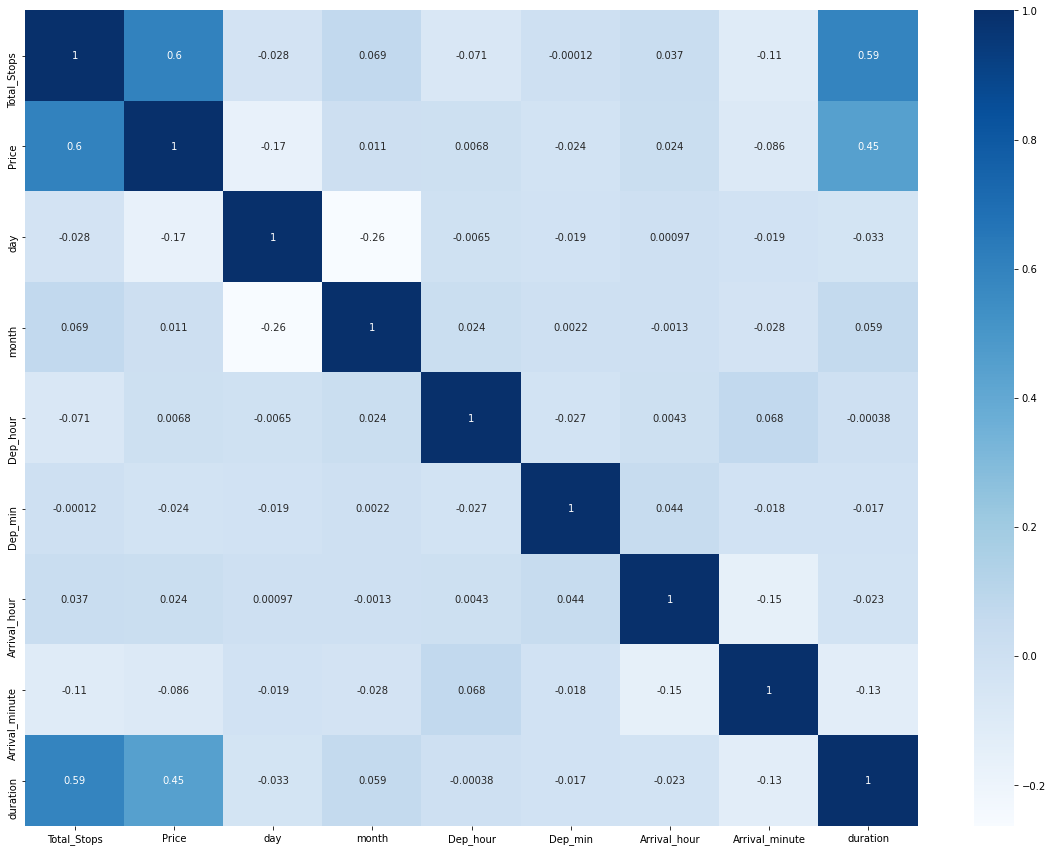

In [181]:
fig = plt.figure(figsize=(20,15))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

Price is highly positive correlated with Total stops and higly negative correlated with Route 2 and Route3.

## checking skewness

In [182]:
df.skew()

Total_Stops       0.317797
Price             1.812552
day               0.389526
month             0.621749
Dep_hour          0.109087
Dep_min           0.159397
Arrival_hour     -0.384591
Arrival_minute    0.111711
duration          0.824423
dtype: float64

In [183]:
# Applying label encoder.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [184]:
# performing label encoding.
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    df[i]=encoder.fit_transform(df[i])


## Data Visualization

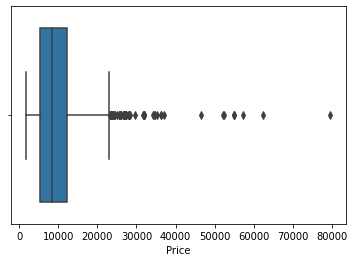

In [185]:
#lets check the box plot of our target column, to check if there are outliers
sns.boxplot(df.Price)
plt.show()


In above plot, we can observe that the Price variable is consists of Outliers.

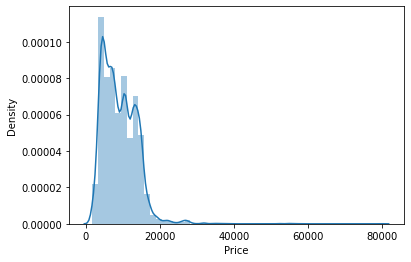

In [186]:
#lets check the distribution of the target column
sns.distplot(df.Price[:10683])
plt.show()


In above plot, we can observe that the Price variable is consists of Right skewed.

## Bivariate Analysis with Target Variable

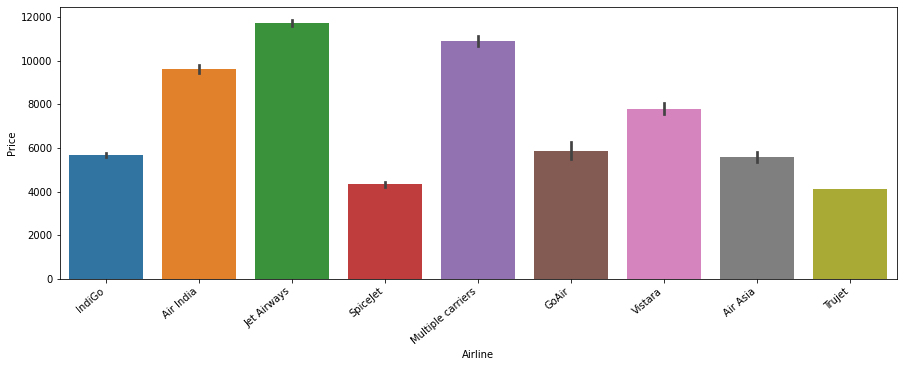

In [187]:
#Lets check Airline column againt our target variable
plt.figure(figsize= (15,5))
col2 = sns.barplot(x = 'Airline' , y ='Price', data = df )
col2.set_xticklabels(col2.get_xticklabels(), rotation=40, ha="right") 
plt.show()

Jet Airways is observed as the highest flight price among all the Airlines and spicejet is having low price.

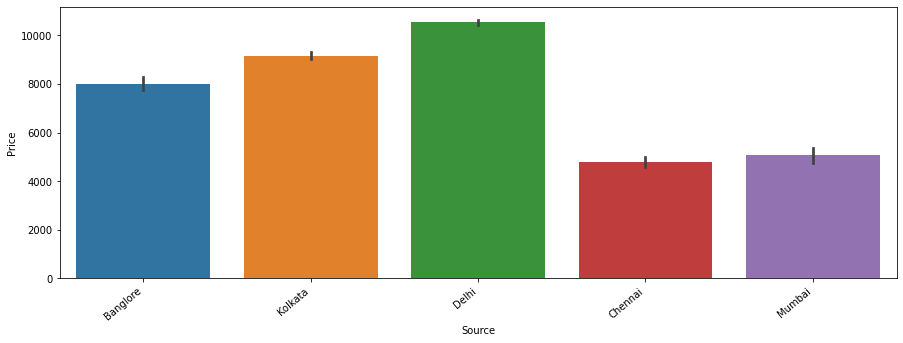

In [188]:
#Lets check Source column againt our target variable
plt.figure(figsize= (15,5))
col4 = sns.barplot(x = 'Source' , y ='Price', data = df )
col4.set_xticklabels(col4.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that people who travelled from delhi have paid more than the others

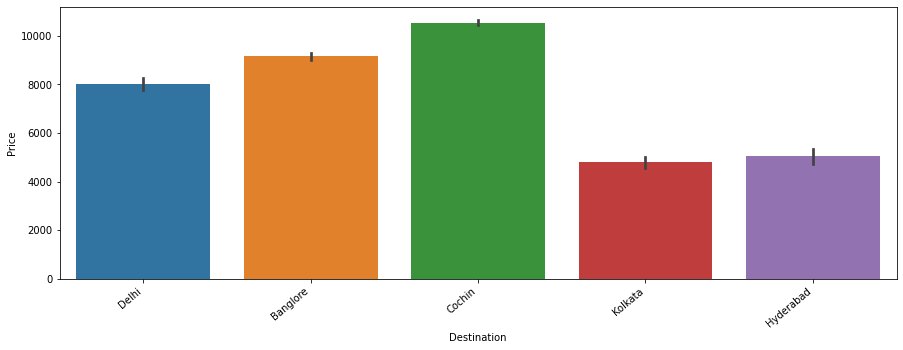

In [189]:
#Lets check Destination column againt our target variable
plt.figure(figsize= (15,5))
col3 = sns.barplot(x = 'Destination' , y ='Price', data = df )
col3.set_xticklabels(col3.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that people who travelled to Cohchin have paid more flight price compare to all

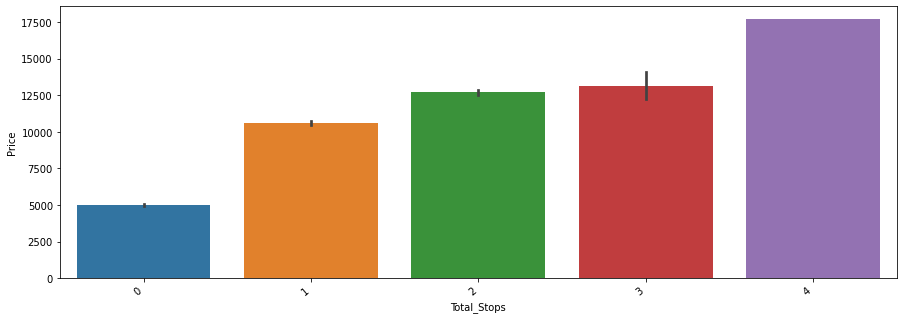

In [190]:
#Lets check Total_Stops column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Total_Stops' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that if the total stops is 4 , then the flight price is high

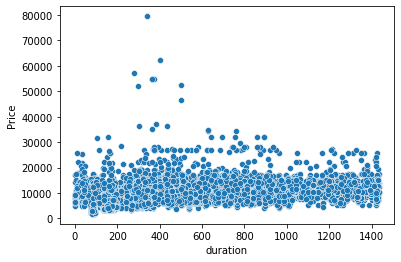

In [191]:
# duration is having numerical values so using scatter plot
#Lets check this column againt our target variable
sns.scatterplot(x = 'duration', y ='Price' , data  = df)
plt.show()


From the above plot we can see that duration and Price is moderate positive correlation with duration column .

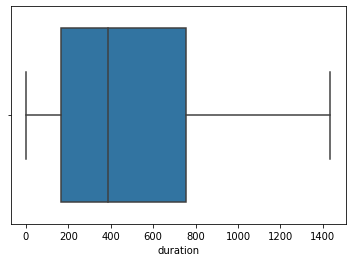

In [192]:
#lets check for outliers in duration column
sns.boxplot(df.duration)
plt.show()

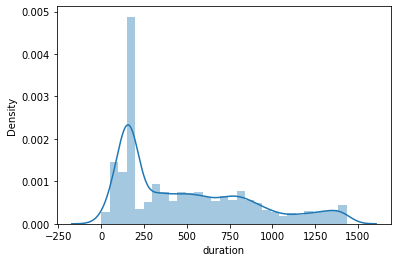

In [193]:
#lets check for distribution 
sns.distplot(df.duration)
plt.show()

Its seems like left skewed in distribution.

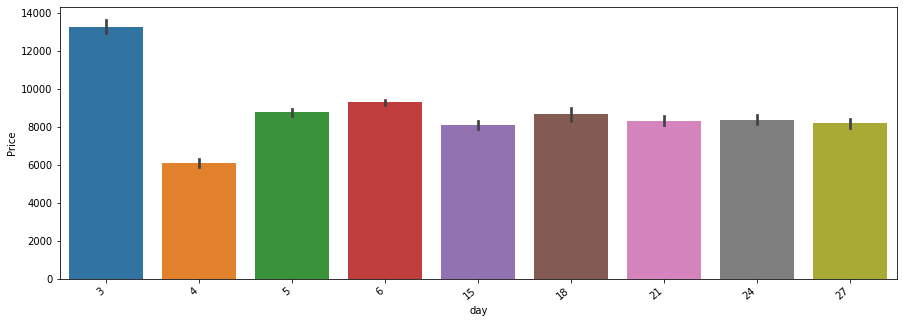

In [194]:
#Lets check day column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'day' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 3rd date of month having high price values.

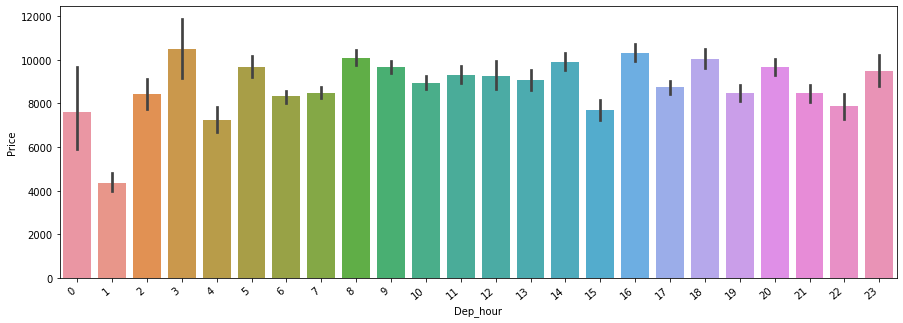

In [195]:
#Lets check Dep_hour column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Dep_hour' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 3AM in Dep_hour is having high price values.

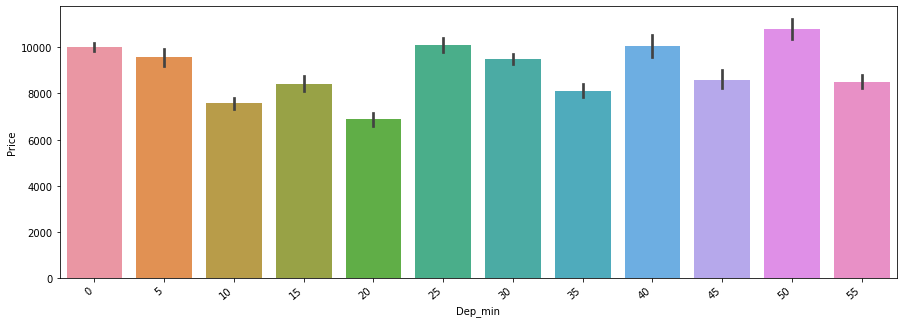

In [196]:
#Lets check Dep_min column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Dep_min' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()


From the above plot we can observe that in 50th minute is having high price values.

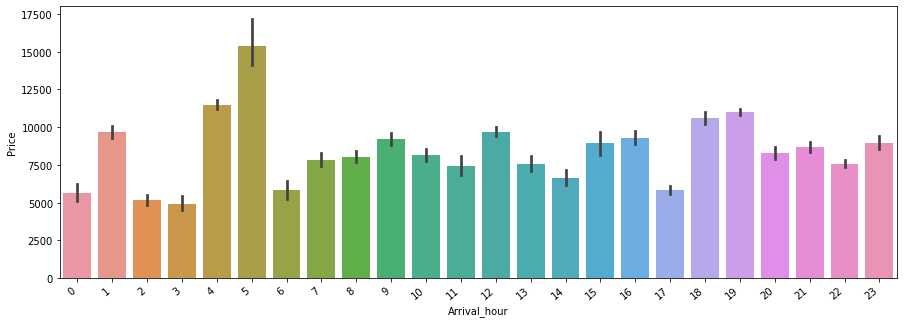

In [197]:
#Lets check Arrival_hour column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Arrival_hour' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 5AM in Arrival_hour is having high price values.

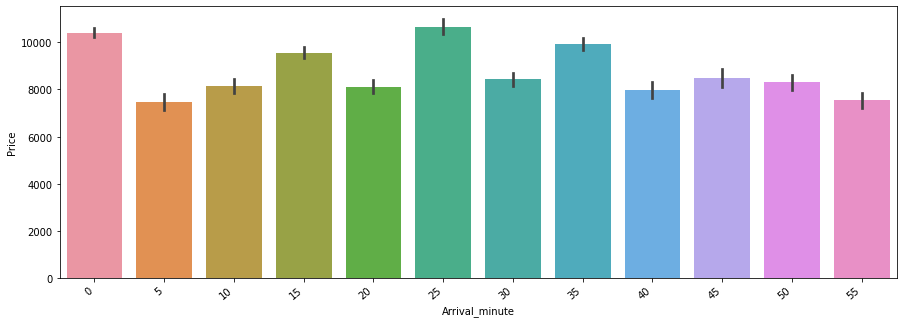

In [198]:
#Lets check Arrival_minute column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Arrival_minute' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()


From the above plot we can observe that in 25th minute is having high price values.

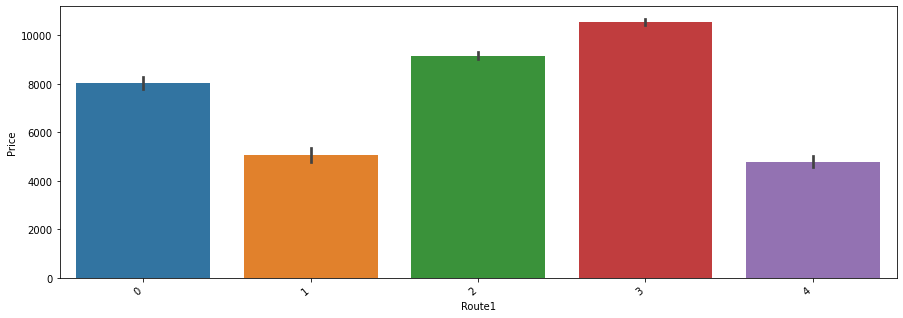

In [199]:
#Lets check Route1 column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route1' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 3rd way is having high price values.

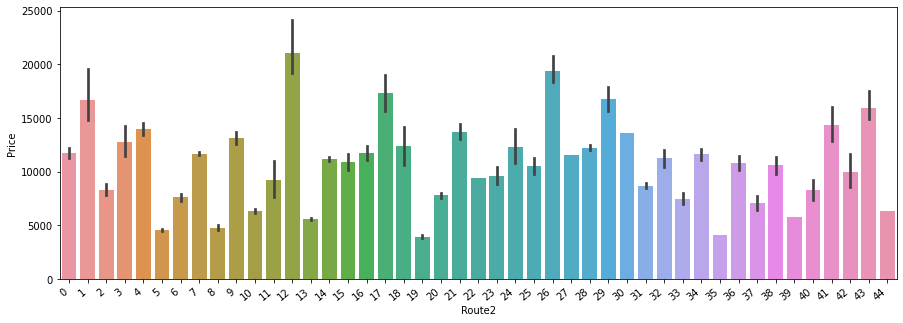

In [200]:
#Lets check Route2 column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route2' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 12th way is having high price values.

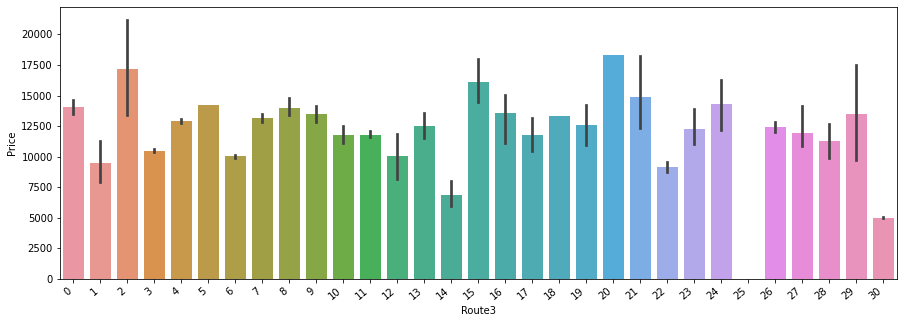

In [201]:
#Lets check Route3 column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route3' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()


From the above plot we can observe that in Route5 20th way is having high price values.

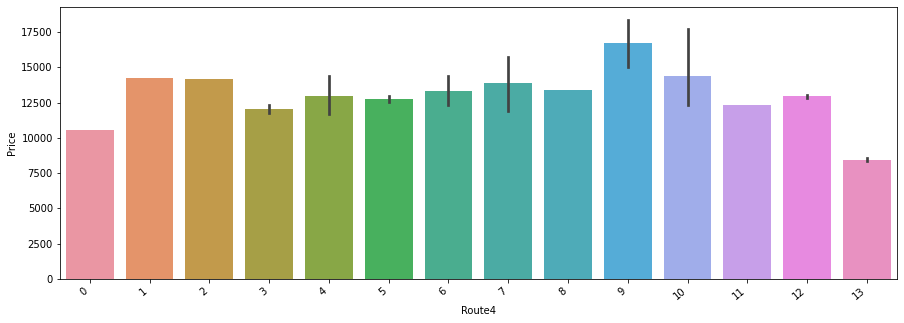

In [202]:
#Lets check Route4 column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route4' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 9th way is having high price values.

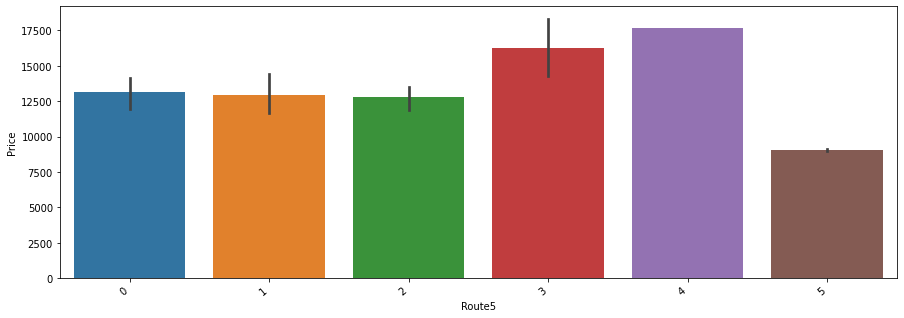

In [203]:
#Lets check Route5 column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route5' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()


From the above plot we can observe that in Route5 4th way is having high price values.

## Outlier Removal in target column

In [204]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [205]:
#calling the function
outliers_IQR3(df,'Price')

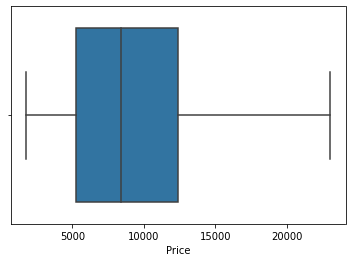

In [206]:
#now lets outliers using box plot
sns.boxplot(df.Price)


outliers have been completely removed from this column.

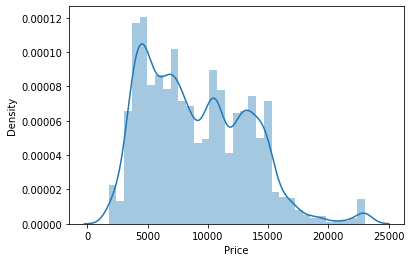

In [207]:
#lets check the distribution of the target column
sns.distplot(df.Price[:10683])
plt.show()

The target is normally distributed now.

In [208]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Additional_Info     object
Price              float64
Temp                object
day                  int64
month                int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_minute       int64
duration           float64
Route1               int64
Route2               int64
Route3               int64
Route4               int64
Route5               int64
dtype: object

In [209]:
one_hot_columns = ['Additional_Info','Airline', 'Destination','Source']
df_new = pd.get_dummies(data = df,columns=one_hot_columns)

we need convert the above columns one-hot encoder, since they are not ordinal values and also columns contains more than 2 unique values.

In [210]:
pd.set_option('display.max_columns', None)
df_new

,Total_Stops,Price,Temp,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration,Route1,Route2,Route3,Route4,Route5,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897.0,Train,24,3,22,20,1,10,170.0,0,13,30,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,7662.0,Train,5,1,5,50,13,15,445.0,2,25,1,3,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2,13882.0,Train,6,9,9,25,4,25,1140.0,3,32,4,5,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218.0,Train,5,12,18,5,23,30,325.0,2,34,3,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,13302.0,Train,3,1,16,50,21,35,285.0,0,34,8,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,NaN,Test,6,6,20,30,20,25,1435.0,2,14,3,13,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13350,0,NaN,Test,27,3,14,20,16,55,155.0,2,5,30,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13351,1,NaN,Test,3,6,21,50,4,25,395.0,3,7,6,13,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
13352,1,NaN,Test,3,6,4,0,19,15,915.0,3,7,6,13,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Scaling the Data

In [211]:
#lets split our x and y column before scaling
#x and y spitting
Y = df_new['Price']
X = df_new.drop('Price',axis = 1)

In [212]:
#dropping temp column
temp = X['Temp']

X.drop('Temp',axis =1 ,inplace = True)

In [213]:
X.shape

(13354, 40)

In [214]:
Y.shape

(13354,)

In [215]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

,Total_Stops,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration,Route1,Route2,Route3,Route4,Route5,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,-1.224526,1.307001,-0.850161,1.653879,-0.239345,-1.797602,-0.885564,-0.845671,-1.672466,0.137945,1.403564,0.409595,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,-0.860590,1.962771,-0.266091,-0.188027,1.962771,-0.188027,-0.860590,-0.605324,-0.266091
1,1.740268,-0.862038,-1.517144,-1.309829,1.353715,-0.057434,-0.583615,-0.126558,-0.012863,1.641200,-1.065884,-2.978701,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,2.256580,-0.135281,-0.487470,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,1.652007,-0.860590,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,-0.860590,1.652007,-0.266091
2,1.740268,-0.747878,1.150788,-0.612486,0.026165,-1.362560,0.020282,1.690836,0.816939,2.518099,-0.810424,-2.301042,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,-0.487470,1.344992,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,1.161993,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,1.161993,-0.605324,-0.266091
3,0.257871,-0.862038,2.151262,0.956536,-1.035875,1.392705,0.322231,-0.440353,-0.012863,2.768642,-0.895577,0.409595,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,1.652007,-0.860590,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,-0.860590,1.652007,-0.266091
4,0.257871,-1.090358,-1.517144,0.607864,1.353715,1.102677,0.624180,-0.544951,-1.672466,2.768642,-0.469810,0.409595,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,-0.860590,1.962771,-0.266091,-0.188027,1.962771,-0.188027,-0.860590,-0.605324,-0.266091


*Now our data is scaled using standard scaler*

# PCA (Principal Component Analysis)

we need to use pca becuase we have 44 columns in this dataset which is very high we should always use scaled data for performing the PCA .


In [216]:
#we have 44 columns excluding target variable
scaled_X.shape

(13354, 40)

In [217]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [218]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score

array([ 13.71820183,  21.97588004,  29.19522939,  35.43762899,
        41.23975973,  45.87119964,  49.75357646,  52.94086854,
        56.01483575,  58.96798442,  61.78039697,  64.4130709 ,
        66.9979534 ,  69.53746001,  72.04509815,  74.5466011 ,
        77.04372889,  79.51466948,  81.95655724,  84.38674166,
        86.64726436,  88.7616203 ,  90.57927423,  92.31673586,
        93.96947329,  95.50716746,  96.9213382 ,  98.22985547,
        99.17368119,  99.96452549, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

In [219]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 25


In [220]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 22


**Now we have seen that how much data will be lost based number of columns .**

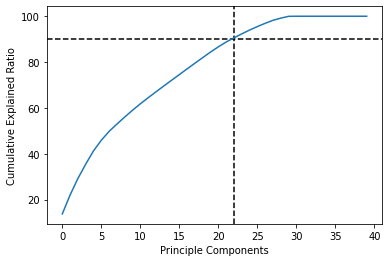

In [221]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

In [222]:
#lets perform the PCA with 22 columns
Final_pca = PCA(n_components= 22)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [223]:
#lets create a datafram
pca_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,3.619434,-1.099806,-1.763158,0.132065,-1.176502,-0.571054,-0.208621,1.911988,-0.296029,-1.266347,-0.819398,0.865049,0.193510,-0.530174,-0.558485,-0.103287,0.076993,-0.416985,-0.824124,-0.109984,0.557787,-1.394862
1,-1.217543,1.648440,0.538227,3.488884,1.091593,2.748884,0.363446,0.336575,-0.519694,0.878565,-1.368389,-0.206002,-0.281283,0.439071,-0.196175,-0.020853,0.006594,-0.156896,0.331411,0.600441,-1.434510,0.130009
2,-3.360575,-0.213263,-1.110955,0.526754,1.180682,2.051423,-0.481632,0.077280,1.820105,-1.187538,-0.138183,-0.251253,0.257225,0.909277,-0.535608,-0.060682,0.049345,-0.559349,0.887050,0.686764,-0.184574,-0.864879
3,0.376574,1.401156,1.451892,2.382211,0.335523,-0.789307,-0.958989,-1.029959,0.889628,-1.385588,-1.838818,-0.505044,0.574230,-0.350015,-0.362149,-0.270966,0.183291,-0.224686,0.162612,1.139845,1.512918,1.238392
4,2.597895,-0.644940,-2.402821,1.282940,-0.348830,0.729441,-0.670784,0.509176,0.248386,0.305485,-2.123644,-0.342629,0.118871,0.101210,-0.721697,-0.363126,0.176016,-0.616977,0.481234,1.195821,1.072536,-0.057475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,-0.678994,2.318648,1.038199,2.641960,-0.004442,0.431279,-0.096869,-0.905316,-0.336956,0.534724,0.232006,0.479495,-0.665121,-0.741902,-0.259686,-0.099258,-0.054752,-0.418348,-1.040754,0.223340,-0.085359,-0.134519
13350,2.008863,0.696684,2.005741,1.433059,-0.596918,-1.870350,-0.070238,2.367435,-0.952998,-0.539115,-0.692310,-0.375671,-0.091018,-0.265089,0.221169,0.044710,0.091531,0.275180,-0.021215,-0.051704,0.290867,0.804990
13351,-1.620441,-0.299381,-0.192562,-0.723547,-0.169778,-0.353647,-0.358696,0.310158,1.854124,0.009506,0.778276,0.285779,-0.370280,-0.124515,-0.331458,-0.068505,-0.046561,-0.618735,-0.354965,0.035718,1.043339,-1.415250
13352,-2.283287,-1.231860,-0.320678,1.012764,-0.079423,0.163685,0.087885,-1.393561,-0.481480,-0.379081,0.210788,0.302929,-0.541378,-0.448955,0.418846,0.171864,-0.053290,0.250656,-0.615150,-0.128626,-0.949804,1.306348


In [224]:
print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.8876162029502837


In [225]:
pca_x.shape

(13354, 22)


## split the data

In [226]:
#lets first add temp column splitting
pca_x['Temp'] = temp

In [227]:
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Temp
0,3.619434,-1.099806,-1.763158,0.132065,-1.176502,-0.571054,-0.208621,1.911988,-0.296029,-1.266347,-0.819398,0.865049,0.193510,-0.530174,-0.558485,-0.103287,0.076993,-0.416985,-0.824124,-0.109984,0.557787,-1.394862,Train
1,-1.217543,1.648440,0.538227,3.488884,1.091593,2.748884,0.363446,0.336575,-0.519694,0.878565,-1.368389,-0.206002,-0.281283,0.439071,-0.196175,-0.020853,0.006594,-0.156896,0.331411,0.600441,-1.434510,0.130009,Train
2,-3.360575,-0.213263,-1.110955,0.526754,1.180682,2.051423,-0.481632,0.077280,1.820105,-1.187538,-0.138183,-0.251253,0.257225,0.909277,-0.535608,-0.060682,0.049345,-0.559349,0.887050,0.686764,-0.184574,-0.864879,Train
3,0.376574,1.401156,1.451892,2.382211,0.335523,-0.789307,-0.958989,-1.029959,0.889628,-1.385588,-1.838818,-0.505044,0.574230,-0.350015,-0.362149,-0.270966,0.183291,-0.224686,0.162612,1.139845,1.512918,1.238392,Train
4,2.597895,-0.644940,-2.402821,1.282940,-0.348830,0.729441,-0.670784,0.509176,0.248386,0.305485,-2.123644,-0.342629,0.118871,0.101210,-0.721697,-0.363126,0.176016,-0.616977,0.481234,1.195821,1.072536,-0.057475,Train


In [228]:
#Lets get out Original Train and Test Dataset provided in the project
X_train_original = pca_x.loc[pca_x["Temp"] == "Train"]
X_test_original = pca_x.loc[pca_x["Temp"]=="Test"]
#X_train_original.reset_index(drop =True, inplace=True)
#X_test_original.reset_index(drop = True, inplace=True)

In [229]:
#lets drop the null values in the Y column
Y.dropna(inplace=True)
Y.shape

(10683,)

In [230]:
#Original X_train dataset
X_train_original.shape

(10683, 23)

In [231]:
#Original X_test dataset
X_test_original.shape

(2671, 23)

In [232]:
#no null values in this series
Y.isnull().sum()

0

In [233]:
# Original X train column from 0th row to 8422th row
X_train_original.drop('Temp',axis = 1,inplace  =True)

In [234]:
# Original X test column from 8523rd row to 14203rd row
X_test_original.drop('Temp',axis = 1,inplace  =True)

In [235]:
#lets Ignore those index now
X_train_original.reset_index(drop =True, inplace=True)
X_test_original.reset_index(drop = True, inplace=True)

# We have provided with X_test data, but Y_test (Label) is not provided

**So lets use our X_train_original and Y_train_Original as X and Y for model selection.**

# Best random state

In [236]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state))

Best r2 score is 0.6185091855454087 on random state 19


In [237]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 19


In [238]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= rand_state )

In [239]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.6185091855454087
Error :
mean absolute error : 4501.166618126097
mean squared error :  153192741.6730362
root mean squared error : 12377.105545039041



R2 score is very less for linear regression, lets check out for other models.

## Model selection :

In [240]:
#lets Choose r2 score of below four Models
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [241]:
#checking each model with Cross val score
model_list = [dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X_train_original,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Scores :
r2 score: 0.6904459330027615
Cross Val score : 0.684156646430443
Error :
mean absolute error : 1295.4321565291366
mean squared error :  5633548.197929958
root mean squared error : 2373.5096793419566
Difference :
Diffrence between cross val score and r2 score is : 0.01


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Scores :
r2 score: 0.804650414197879
Cross Val score : 0.7907547085165152
Error :
mean absolute error : 1195.73373032752
mean squared

In [242]:
#lets check the least difference between r2 score and cross val score
least_difference

[(DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
  'Diffrence between cross val score and r2 score error is : 0.01'),
 (KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
  'Diffrence between cross val score and r2 score error is : 0.01'),
 (RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impuri

In [243]:
#we can see that there no differnec between cross val score and R2 score for random forest
least_difference[2]

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'Diffrence between cross val score and r2 score error is : 0.02')

RandomForestRegressor() is having 0.02 difference, R2 score is also high and errors are less compared to other models so lets choose random as our final model there is no overfitting in this model.

In [244]:
#we can see that there no differnec between cross val score and R2 score for random forest
least_difference[2]

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'Diffrence between cross val score and r2 score error is : 0.02')

## Saving the model:

In [245]:
#serialization using joblib
import joblib
joblib.dump(final_model_rf,'Flight_Price.obj')

['Flight_Price.obj']

## Conclustion :-

**We have RandomForest Model with 83.71% r2_score and no overfitting in the model**